In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from helpers import split_data_set, view_dataset_batches

In [3]:
from var import IMAGE_SIZE, DATASET_DIRECTORY, BATCH_SIZE, TRAINING_SIZE, SHUFFLE_SIZE, SEED

<h1>Fetch Data From Dataset</h1>

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIRECTORY,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1288 files belonging to 18 classes.


In [5]:
class_names = dataset.class_names
class_names

['Acrylic',
 'Blended',
 'Chenille',
 'Corduroy',
 'Cotton',
 'Denim',
 'Fleece',
 'Leather',
 'Linen',
 'Nylon',
 'Polyester',
 'Satin',
 'Silk',
 'Terrycloth',
 'Unclassified',
 'Velvet',
 'Viscose',
 'Wool']

In [6]:
n_classes = len(class_names)
n_classes

18

In [7]:
len(dataset)

41

In [8]:
for image_batch, label_batch in dataset.take(1):
    print("Image shape:", image_batch.shape)
    print("Image class:", label_batch.numpy())

Image shape: (32, 400, 400, 3)
Image class: [ 2  3 11  6  5  6 17 13  8 13 11 13  9 12  3  3  1  5  3 11  2 10  9  5
  4  0 12  4 10 14 14  7]


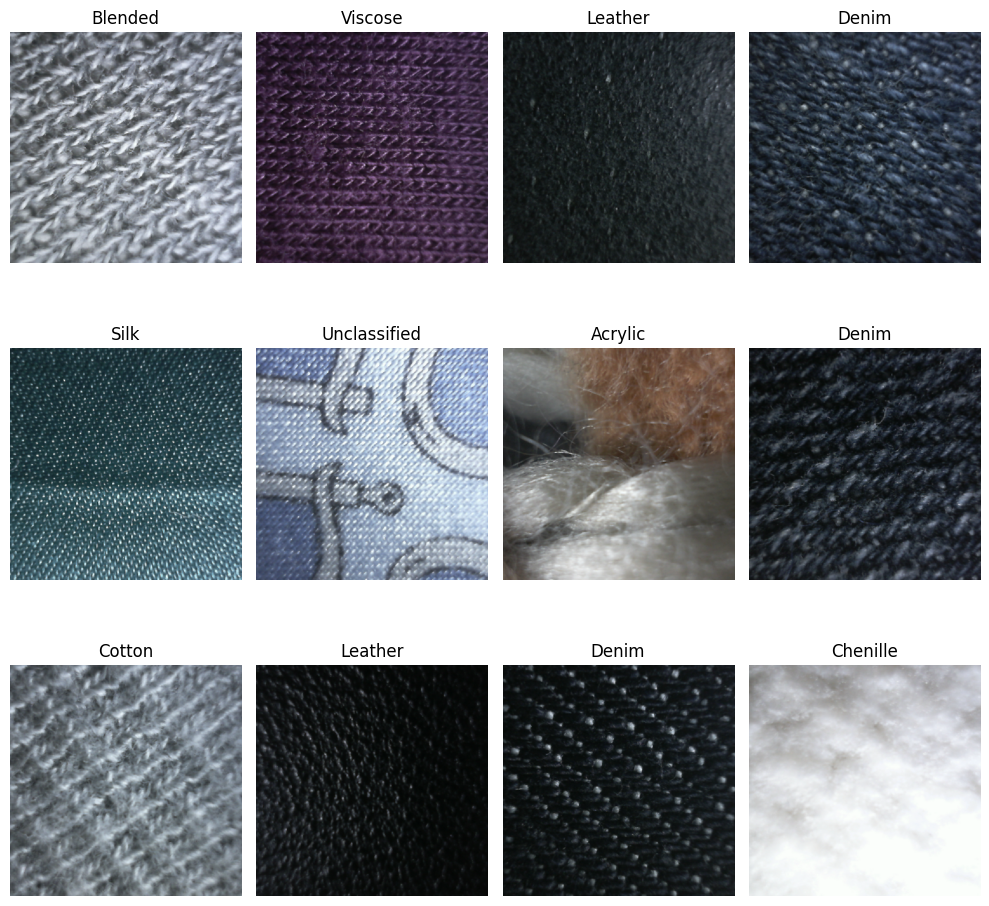

In [9]:
view_dataset_batches(dataset, class_names)

<h1>Split data</h1>
<h4 style="margin-bottom: 8px;">we will split the dataset to:</h4>
<p style="margin: 0;">80% ==> training</p>
<p style="margin: 0;">20% ==> 10% validation, 10% test</p>

In [10]:
training_ds, validation_ds, testing_ds = split_data_set(dataset, TRAINING_SIZE, 0.1, True, SHUFFLE_SIZE, SEED)

In [11]:
len(training_ds)

32

In [12]:
len(validation_ds)

4

In [13]:
len(testing_ds)

5

In [14]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
testing_ds = testing_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)